In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
ax = fig.gca(projection='3d')from IPython.display import clear_output
np.random.seed(30)
axis_n=2
X = np.random.randint(-80,80,(1000,axis_n))
# Y = np.random.randint(0,85,(100,2))
# Z = np.vstack((X,Y))
Z = np.float32(X)
axis_n1=[chr(x) for x in range(65,65+axis_n)]
k=3
centros=[]
for cp in range(k):
    centros.append(X[cp])
    
    
    
for iteracion in range(20):
    kmeans=pd.DataFrame(Z,columns=axis_n1)
    for i,pt in enumerate(centros):
        kmeans["d"+str(i)]=np.sqrt(np.array([(x-pt[0])**2 for x in Z[:,0]])+np.array([(y-pt[1])**2 for y in Z[:,1]]))
        

    kmeans.loc[(kmeans["d0"]<=kmeans["d1"])&(kmeans["d0"]<=kmeans["d2"]),"grupo"]=0
    kmeans.loc[(kmeans["d1"]<=kmeans["d0"])&(kmeans["d1"]<=kmeans["d2"]),"grupo"]=1
    kmeans.loc[(kmeans["d2"]<=kmeans["d1"])&(kmeans["d2"]<=kmeans["d0"]),"grupo"]=2
    kmeans
    plt.scatter(kmeans[kmeans["grupo"]==0][axis_n1[0]],kmeans[kmeans["grupo"]==0][axis_n1[1]])
    plt.scatter(kmeans[kmeans["grupo"]==1][axis_n1[0]],kmeans[kmeans["grupo"]==1][axis_n1[1]],c="k")
    plt.scatter(kmeans[kmeans["grupo"]==2][axis_n1[0]],kmeans[kmeans["grupo"]==2][axis_n1[1]],c="g")
    centros=[np.array(kmeans[kmeans["grupo"]==0][[axis_n1[0],axis_n1[1]]].mean()),np.array(kmeans[kmeans["grupo"]==1][[axis_n1[0],axis_n1[1]]].mean()),np.array(kmeans[kmeans["grupo"]==2][[axis_n1[0],axis_n1[1]]].mean())]
    for pt in centros:
        plt.scatter(pt[0],pt[1],c = 'r')
#     plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
#     plt.xlabel('Height'),plt.ylabel('Weight')
#     plt.savefig("a"+str(iteracion)+".png")
    plt.show()
    
    clear_output(wait=True)
    
    

In [165]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
np.random.seed(100)
axis_n=3
img=cv2.imread(r"C:\Users\ASUS\Desktop\2.png")
X = img.reshape((-1,3))
X=np.array(X/1,dtype="uint8")*1
# X.shape
# X = np.random.randint(-1000,1000,(10000,axis_n))
# Y = np.random.randint(0,85,(100,2))
# Z = np.vstack((X,Y))
Z = np.float32(X)
axis_n1=range(axis_n)#[chr(x) for x in ]
k=2
p_3d=True
if axis_n<3:
    p_3d=False
centros=[]
kmeans=pd.DataFrame(Z,columns=axis_n1)
np.random.seed(10)
centros=np.random.randint(0,255,(k,axis_n))
color=np.random.rand(k,3)
kmeans=pd.DataFrame(Z,columns=axis_n1)
kmeans["menor"]=1e5
kmeans["grupo"]=0
for iteracion in range(40):
    kmeans["menor"]=1e5
    for i,pt in enumerate(centros):
        kmeans["d"+str(i)]=list(np.sqrt(np.sum((centros[i]-Z)**2,axis=1)))
        kmeans.loc[kmeans["d"+str(i)]<=kmeans["menor"],"grupo"]=i
        kmeans.loc[kmeans["d"+str(i)]<=kmeans["menor"],"menor"]=kmeans["d"+str(i)][kmeans["d"+str(i)]<=kmeans["menor"]]
    if p_3d:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    for i,pt in enumerate(centros):
        if p_3d:
            ax.scatter(kmeans[kmeans["grupo"]==i][axis_n1[0]],kmeans[kmeans["grupo"]==i][axis_n1[1]],kmeans[kmeans["grupo"]==i][axis_n1[2]],c=color[i])
        else:
            plt.scatter(kmeans[kmeans["grupo"]==i][axis_n1[0]],kmeans[kmeans["grupo"]==i][axis_n1[1]],c=color[i])
    centros=[]
    for cp in range(k):
        centros.append(np.array((kmeans[kmeans["grupo"]==cp])[axis_n1].mean()))


    for pt in centros:
        if p_3d:
            ax.scatter(pt[0],pt[1],pt[2],c = 'r')
        else:
            plt.scatter(pt[0],pt[1],c = 'r',marker="x")

    plt.show()
    print(iteracion)
    
    clear_output(wait=True)
    

KeyboardInterrupt: 

In [ ]:
np.array(centros[1],dtype="uint8")

In [ ]:
balck=np.full((5,5, 3), np.array(centros[0],dtype="uint8"), dtype=np.uint8)
cv2_imshow("s",balck)

In [ ]:
np.array(X/10,dtype="uint8")

In [ ]:
np.random.randint(0,255,(k,axis_n))

In [164]:
def normalizar_array(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))
img=cv2.imread(r"C:\Users\ASUS\Desktop\template-matching-using-opencv-wolf-template.jpg")
X = img.reshape((-1,3))
f=1
axis_n1=range(3)
X=np.array(X/f,dtype="uint8")*f
Z = np.float32(X)
kmeans=pd.DataFrame(Z,columns=axis_n1)
kmeans["menor"]=1e5
kmeans["grupo"]=0
# for iteracion in range(40):
r=160
centros=np.array([[59,157,60],[0,0,0],[245,46,3],[255,255,255]])#[150,150,150],[180,180,180],[200,200,200]
k=3
# aa=255/(k-1)
# centros=[]
# for i in range(k):
#     centros.append([aa*i,aa*i,aa*i])
# centros=np.array(centros,dtype="uint8")
kmeans["menor"]=1e5
for i,pt in enumerate(centros):
    kmeans["d"+str(i)]=list(np.sqrt(np.sum((centros[i]-Z)**2,axis=1)))
    kmeans.loc[kmeans["d"+str(i)]<=kmeans["menor"],"grupo"]=i
    kmeans.loc[kmeans["d"+str(i)]<=kmeans["menor"],"menor"]=kmeans["d"+str(i)][kmeans["d"+str(i)]<=kmeans["menor"]]
# res=normalizar_array(kmeans["grupo"].values)*255
# res=kmeans[[0,1,2]]
res=centros[kmeans["grupo"].values]
res2 = np.array(res.reshape((img.shape[0],img.shape[1],3)),dtype="uint8")
res2.shape
cv2_imshow("a",res2)
cv2.imwrite(r"C:\Users\ASUS\Desktop\f.png",res2)

True

In [160]:
kmeans["grupo"].value_counts()

0    11912
2      309
Name: grupo, dtype: int64

In [150]:
np.array(kmeans[[0,1,2]].values,dtype="uint8")

array([[237, 234, 232],
       [237, 234, 232],
       [237, 234, 232],
       ...,
       [244, 242, 240],
       [254, 253, 253],
       [245, 244, 243]], dtype=uint8)

In [128]:
cv2.imwrite(r"C:\Users\ASUS\Desktop\f.png",np.array(normalizar_array(img**1.2)*255,dtype="uint8"))

True

In [ ]:
([59,157,60],[240,240,240])

In [57]:
aa=255/(k-1)
centros=[]
for i in range(k):
    centros.append([aa*i,aa*i,aa*i])
centros=np.array(centros,dtype="uint8")

In [133]:
img=cv2.imread(r"C:\Users\ASUS\Desktop\WhatsApp Image 2023-05-11 at 2.04.58 PM.jpeg")[:,:,0]
i=np.array(normalizar_array(img**1.5)*255,dtype="uint8")
h,w=i.shape
i=cv2.resize(i,(int(h/2),int(w/2)))
i=cv2.resize(i,(h,w))
cv2_imshow("a",i)
cv2.imwrite(r"C:\Users\ASUS\Desktop\f.png",i)

True

In [126]:
np.array(normalizar_array(img**1.2)*255,dtype="uint8")

array([[220, 232, 222, ...,  49,  49,  46],
       [214, 222, 215, ...,  54,  56,  56],
       [212, 206, 200, ...,  54,  58,  59],
       ...,
       [ 59,  58,  59, ...,  48,  67,  73],
       [ 58,  59,  61, ...,  51,  72,  80],
       [ 55,  59,  62, ...,  71,  88,  97]], dtype=uint8)

In [83]:
# kernel1 = np.array([[1, 1, -1],
#                     [1, 1, -1],
#                     [1,1, -1]])/3
 
# identity = cv2.filter2D(src=res2, ddepth=-1, kernel=kernel1)
# identity=cv2.blur(identity,(10,10))
import numpy as np
import skimage.measure

# identity=skimage.measure.block_reduce(res2, (2,2), np.max)
h,w=res2.shape
e=cv2.resize(res2,(int(h/2.5),int(w/2.5)))
identity=cv2.resize(e,(h,w), interpolation = cv2.INTER_AREA)
cv2.imwrite(r"C:\Users\ASUS\Desktop\f.png",identity)
cv2_imshow("a",identity)

In [ ]:
centros[kmeans["grupo"].values,0]

In [61]:
import numpy as np
import skimage.measure

identity=skimage.measure.block_reduce(res2, (2,2), np.max)

array([[255, 255, 255, ..., 127, 127, 127],
       [255, 255, 255, ..., 127, 127, 127],
       [255, 255, 255, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

In [66]:
cv2_imshow("a",res2)

In [ ]:
def normalizar_array(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

In [ ]:
res=normalizar_array(kmeans["grupo"].values)*127
res2 = np.array(res.reshape((665,524)),dtype="uint8")
res2.shape
# cv2_imshow("a",res2)

In [ ]:
cv2_imshow("a",res2)

In [ ]:
255/2

In [2]:
axis_n1=range(axis_n)

NameError: name 'axis_n' is not defined

In [112]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread(r"C:\Users\ASUS\Desktop\1.png")
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread(r"C:\Users\ASUS\Desktop\2.png", cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2_imshow("a",res)

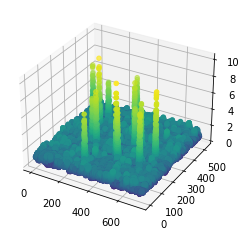

In [116]:
import matplotlib.pyplot as plt
xp,yp=res.shape
x = np.arange(0, xp, 1)
y = np.arange(0, yp, 1)
Y, X = np.meshgrid(y, x)
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.set_zlim3d(np.min(res), np.max(res))
ax.scatter(Y,X,10**res,c=res)

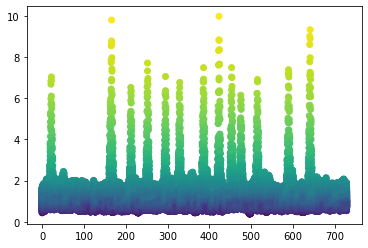

In [119]:
plt.scatter(Y,10**res,c=res)